# Objectives

The objectives of this notebook is to provide solution to the questions for the P2 Coding Challenge. This would showcase basic coding skills that covers basic data collection and data analysis techniques

## API request to collect the data

In [1]:
import pandas as pd
import numpy as np
import json

import urllib
import requests

from io import StringIO

In [2]:
# API call

action = 'https://data.gov.au/data/api/3/action/datastore_search?'
resource_id = 'resource_id=809c77d8-fd68-4a2c-806f-c63d64e69842'

url = action + resource_id

def collect_data_API_request(url,rows_retrieve):
    ''' the function is used to interact with the API and collect data.
    url: url for http request to API
    rows_retrieve parameter: number of rows requested (int) or All
    '''
    
    # setting if rows_retireve = 'All', code will get the total from the 
    if rows_retrieve == 'All':
        with urllib.request.urlopen(url + '&limit=1') as response:
            data = response.read()
        JSONContent = requests.get(url).json()
        content = json.dumps(JSONContent, indent=4, sort_keys=True)
        df_content = pd.read_json(StringIO(content))
        max_content = df_content['result']['total']
        limit = '&limit='+ str(max_content)
        
        url = url + limit
        
        # re-retrieve using the maximum number of rows from gathered from the API call
        with urllib.request.urlopen(url) as response:
            data = response.read()
        JSONContent = requests.get(url).json()
        content = json.dumps(JSONContent, indent=4, sort_keys=True)
        df_content = pd.read_json(StringIO(content))
        df = pd.json_normalize(df_content['result']['records'])
    
    # setting if rows_retrieve = integer (will use &limit= number of rows requested)
    else:
        limit = '&limit='+ str(rows_retrieve)
        url = url + limit
        with urllib.request.urlopen(url) as response:
            data = response.read()
        JSONContent = requests.get(url).json()
        content = json.dumps(JSONContent, indent=4, sort_keys=True)
        df_content = pd.read_json(StringIO(content))
        df = pd.json_normalize(df_content['result']['records'])
        
    return df

df = collect_data_API_request(url,rows_retrieve='All')

# Data Exploration

## Summary
Assumptions made
1. None/Null values indicate a zero. this assumption is based on Airline for example 
Airline - FederalExpressCorporation or FEDEX is a freight company and not a passenger company which values in Passenger In and Out are None/Null

In [3]:
# Explore dataframe to answer the 3 questions provided:
df.head(3)

,Airline,Freight_In_(tonnes),Freight_Out_(tonnes),Mail_In_(tonnes),Mail_Out_(tonnes),Month,Month_num,Passengers_In,Passengers_Out,Port_Country,Year,_id
0,Qantas Airways,213.459,86.277,37.112,13.115,Dec-17,12,6542,7112,Thailand,2017,39224
1,Air France,13.081,4.797,3.191,0.208,Sep-95,9,694,383,France,1995,11233
2,Merpati Nusantara Airlines,0,0,0,0,Sep-07,9,160,180,Indonesia,2007,26264


In [4]:
df.info()
# there where some null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43457 entries, 0 to 43456
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Airline               43457 non-null  object
 1   Freight_In_(tonnes)   43439 non-null  object
 2   Freight_Out_(tonnes)  43449 non-null  object
 3   Mail_In_(tonnes)      43439 non-null  object
 4   Mail_Out_(tonnes)     43449 non-null  object
 5   Month                 43457 non-null  object
 6   Month_num             43457 non-null  object
 7   Passengers_In         43424 non-null  object
 8   Passengers_Out        43425 non-null  object
 9   Port_Country          43457 non-null  object
 10  Year                  43457 non-null  object
 11  _id                   43457 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 4.0+ MB


In [5]:
# show how many null values
df.isnull().sum()

Airline                  0
Freight_In_(tonnes)     18
Freight_Out_(tonnes)     8
Mail_In_(tonnes)        18
Mail_Out_(tonnes)        8
Month                    0
Month_num                0
Passengers_In           33
Passengers_Out          32
Port_Country             0
Year                     0
_id                      0
dtype: int64

In [6]:
# show number of unique entries
df.nunique()

Airline                   197
Freight_In_(tonnes)     32307
Freight_Out_(tonnes)    34457
Mail_In_(tonnes)        13762
Mail_Out_(tonnes)       11325
Month                     438
Month_num                  12
Passengers_In           16033
Passengers_Out          15885
Port_Country               84
Year                       37
_id                     43457
dtype: int64

In [7]:
# There are no zero values for the Passengers Out/In
print("Passengers_Out:" + str(df[df['Passengers_Out']==0].shape[0]))
print("Passengers_In:" + str(df[df['Passengers_In']==0].shape[0]))

Passengers_Out:0
Passengers_In:0


In [8]:
df[df['Passengers_Out'].isnull()].head() 
# null values then to be Freight/Mail flights, assume Passengers = 0 when values are null

,Airline,Freight_In_(tonnes),Freight_Out_(tonnes),Mail_In_(tonnes),Mail_Out_(tonnes),Month,Month_num,Passengers_In,Passengers_Out,Port_Country,Year,_id
1558,QantasAirways,91.702,0,0,0,Mar-20,3,None,None,Korea,2020,42251
2735,Pacific Air Express,2.19,21.312,0,0,Feb-20,2,None,None,Papua New Guinea,2020,42130
4969,PolarAirCargo,None,123.433,None,0,Mar-20,3,None,None,Korea,2020,42243
6677,FederalExpressCorporation,None,2342.839,None,0,Mar-20,3,None,None,China,2020,42214
8239,Emirates,345.661,None,0,None,Feb-20,2,None,None,USA,2020,42102


In [9]:
# example of a Non Passenger flight
df[df['Airline']=='FederalExpressCorporation']

,Airline,Freight_In_(tonnes),Freight_Out_(tonnes),Mail_In_(tonnes),Mail_Out_(tonnes),Month,Month_num,Passengers_In,Passengers_Out,Port_Country,Year,_id
6677,FederalExpressCorporation,None,2342.839,None,0,Mar-20,3,None,None,China,2020,42214
30672,FederalExpressCorporation,1179.367,None,0,None,Mar-20,3,None,None,USA,2020,42216
36888,FederalExpressCorporation,1235.227,None,0,None,Mar-20,3,None,None,Singapore,2020,42215


In [10]:
df[df['Freight_In_(tonnes)'].isnull()].head()

,Airline,Freight_In_(tonnes),Freight_Out_(tonnes),Mail_In_(tonnes),Mail_Out_(tonnes),Month,Month_num,Passengers_In,Passengers_Out,Port_Country,Year,_id
4969,PolarAirCargo,None,123.433,None,0,Mar-20,3,None,None,Korea,2020,42243
6677,FederalExpressCorporation,None,2342.839,None,0,Mar-20,3,None,None,China,2020,42214
8270,UnitedParcelService,None,719.58,None,0,Mar-20,3,None,None,Korea,2020,42277
10260,Qantas Airways,None,127.01,None,0,Feb-20,2,None,None,Malaysia,2020,42141
12470,QantasAirways,None,124.645,None,0,Mar-20,3,None,None,Taiwan,2020,42258


In [11]:
df[df['Freight_Out_(tonnes)'].isnull()]

,Airline,Freight_In_(tonnes),Freight_Out_(tonnes),Mail_In_(tonnes),Mail_Out_(tonnes),Month,Month_num,Passengers_In,Passengers_Out,Port_Country,Year,_id
8239,Emirates,345.661,None,0,None,Feb-20,2,None,None,USA,2020,42102
13407,Federal Express Corporation,982.993,None,0,None,Feb-20,2,None,None,Singapore,2020,42106
21723,UnitedParcelService,1278.3,None,0,None,Mar-20,3,None,None,USA,2020,42279
30450,KalittaAir,74.254,None,0,None,Mar-20,3,None,None,USA,2020,42232
30672,FederalExpressCorporation,1179.367,None,0,None,Mar-20,3,None,None,USA,2020,42216
36888,FederalExpressCorporation,1235.227,None,0,None,Mar-20,3,None,None,Singapore,2020,42215
38388,United Parcel Service,1119.695,None,0,None,Feb-20,2,None,None,USA,2020,42170
42185,Federal Express Corporation,1077.229,None,0,None,Feb-20,2,None,None,USA,2020,42107


In [12]:
df[df['Mail_Out_(tonnes)'].isnull()]

,Airline,Freight_In_(tonnes),Freight_Out_(tonnes),Mail_In_(tonnes),Mail_Out_(tonnes),Month,Month_num,Passengers_In,Passengers_Out,Port_Country,Year,_id
8239,Emirates,345.661,None,0,None,Feb-20,2,None,None,USA,2020,42102
13407,Federal Express Corporation,982.993,None,0,None,Feb-20,2,None,None,Singapore,2020,42106
21723,UnitedParcelService,1278.3,None,0,None,Mar-20,3,None,None,USA,2020,42279
30450,KalittaAir,74.254,None,0,None,Mar-20,3,None,None,USA,2020,42232
30672,FederalExpressCorporation,1179.367,None,0,None,Mar-20,3,None,None,USA,2020,42216
36888,FederalExpressCorporation,1235.227,None,0,None,Mar-20,3,None,None,Singapore,2020,42215
38388,United Parcel Service,1119.695,None,0,None,Feb-20,2,None,None,USA,2020,42170
42185,Federal Express Corporation,1077.229,None,0,None,Feb-20,2,None,None,USA,2020,42107


In [13]:
df['Month'] = pd.to_datetime(df['Month'],format='%b-%y')

# assume null values as zero based on the previous analysis
df['Freight_In_(tonnes)'] = df['Freight_In_(tonnes)'].fillna('0').astype('float')
df['Freight_Out_(tonnes)'] = df['Freight_Out_(tonnes)'].fillna('0').astype('float')
df['Passengers_In'] = df['Passengers_In'].fillna('0').astype('float')
df['Passengers_Out'] = df['Passengers_Out'].fillna('0').astype('float')
df['Mail_In_(tonnes)'] = df['Mail_In_(tonnes)'].fillna('0').astype('float')
df['Mail_Out_(tonnes)'] = df['Mail_Out_(tonnes)'].fillna('0').astype('float')

df['Month_num'] = df['Month_num'].astype('int')

In [14]:
# basic summary statistics 
df.describe()

,Freight_In_(tonnes),Freight_Out_(tonnes),Mail_In_(tonnes),Mail_Out_(tonnes),Month_num,Passengers_In,Passengers_Out,_id
count,43457.000000,43457.000000,43457.000000,43457.000000,43457.000000,43457.000000,43457.000000,43457.000000
mean,296.282131,268.724990,14.361627,8.443977,6.465840,8154.658559,8042.100214,21729.000000
std,668.669115,613.469737,40.494378,28.820094,3.464127,15946.575287,15702.570516,12545.099661
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,2.008000,7.916000,0.000000,0.000000,3.000000,378.000000,399.000000,10865.000000
50%,58.915000,55.730000,0.020000,0.000000,6.000000,2331.000000,2288.000000,21729.000000
75%,276.257000,224.060000,5.067000,2.589000,9.000000,7611.000000,7396.000000,32593.000000
max,8512.982000,9017.617000,458.975000,492.977000,12.000000,171730.000000,171339.000000,43457.000000


# Questions and Answers

## How many passengers flew into and out of Australia for each airline in each month of 2019?

In [15]:
# add the Passengers In and Out
df['Passengers_In_Out'] = df.apply(lambda x: x['Passengers_In'] + x['Passengers_Out'],axis=1)
# filter for 2019 only
df_2019 = df[df['Year']=='2019']
# Answer: Dataframe below shows a sum of Monthly Passengers_In_Out per Airline on year 2019
df_2019 = df_2019.groupby(['Month_num','Airline']).Passengers_In_Out.sum().reset_index()
df_2019

,Month_num,Airline,Passengers_In_Out
0,1,Air Caledonie International,15627.0
1,1,Air Canada,37121.0
2,1,Air China,52240.0
3,1,Air India,16083.0
4,1,Air Mauritius,6633.0
...,...,...,...
740,12,United Airlines,58498.0
741,12,United Parcel Service,0.0
742,12,Vietnam Airlines,35147.0
743,12,Virgin Australia,270309.0


In [16]:
# example airline view
df_2019[df_2019['Airline']=='Virgin Australia']

,Month_num,Airline,Passengers_In_Out
59,1,Virgin Australia,263103.0
120,2,Virgin Australia,197512.0
181,3,Virgin Australia,219220.0
242,4,Virgin Australia,247892.0
303,5,Virgin Australia,214853.0
365,6,Virgin Australia,219602.0
427,7,Virgin Australia,256265.0
489,8,Virgin Australia,247367.0
552,9,Virgin Australia,234204.0
615,10,Virgin Australia,252820.0


## In the last 6 months which port country was responsible for the most passengers coming into the country?

In [22]:
# look into date range
print('minimum Month/Year: ' + str(df['Month'].min()))
print('maximum Month/Year: ' + str(df['Month'].max()))

minimum Month/Year: 1985-01-01 00:00:00
maximum Month/Year: 2021-06-01 00:00:00


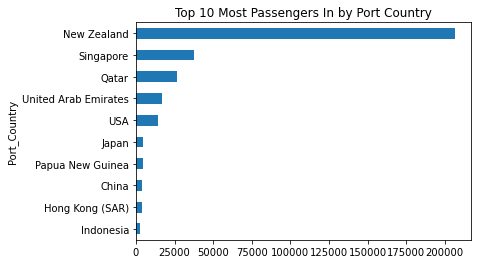

In [23]:
# last 6 months from and to dates
df_last6months = df[(df['Month']<=pd.to_datetime('2021-06-01')) & (df['Month']>=pd.to_datetime('2021-01-01'))]
df_last6months = df_last6months.groupby(['Port_Country'])['Passengers_In'].sum().sort_values(ascending=True)
df_last6months.tail(10).plot(kind='barh',title='Top 10 Most Passengers In by Port Country');
# Answer = New Zealand

## What is the 3 month rolling average of freight arriving to Australia for each airline throughout 2018?

In [24]:
# select 2018 & include 2 months of 2017 to complete the 2018 rolling from January
df_2018 = df[(df['Month']>=pd.to_datetime('2017-11-01')) & (df['Month']<=pd.to_datetime('2018-12-01'))]
# calculate 3 months rolling average for each airline
df_2018_rolling3 = df_2018.groupby(['Month','Airline']).sum()['Freight_In_(tonnes)'].rolling(3).mean().reset_index()
df_2018_rolling3 = df_2018_rolling3[(df_2018_rolling3['Month']>=pd.to_datetime('2018-01-01')) & (df_2018_rolling3['Month']<=pd.to_datetime('2018-12-01'))]
# rename column
df_2018_rolling3 = df_2018_rolling3.rename(columns={'Freight_In_(tonnes)':'Freight_In_(tonnes)_3mths_rolling_Avg'})

In [25]:
# Answer: dataframe containing monthly rolling average per each arriving airline to Australia
df_2018_rolling3

,Month,Airline,Freight_In_(tonnes)_3mths_rolling_Avg
122,2018-01-01,Air Caledonie International,461.321667
123,2018-01-01,Air Canada,227.277667
124,2018-01-01,Air China,395.575000
125,2018-01-01,Air India,442.480333
126,2018-01-01,Air Mauritius,372.701000
...,...,...,...
854,2018-12-01,United Airlines,665.868000
855,2018-12-01,United Parcel Service,741.855000
856,2018-12-01,Vietnam Airlines,899.600333
857,2018-12-01,Virgin Australia,1161.323667


In [26]:
# example
df_2018_rolling3[df_2018_rolling3['Airline']=='Air Canada']

,Month,Airline,Freight_In_(tonnes)_3mths_rolling_Avg
123,2018-01-01,Air Canada,227.277667
184,2018-02-01,Air Canada,217.463667
244,2018-03-01,Air Canada,190.191333
305,2018-04-01,Air Canada,272.959333
366,2018-05-01,Air Canada,309.532333
428,2018-06-01,Air Canada,329.913667
490,2018-07-01,Air Canada,267.318000
552,2018-08-01,Air Canada,337.193333
614,2018-09-01,Air Canada,268.668000
676,2018-10-01,Air Canada,265.421000


In [27]:
df_2018_rolling3[df_2018_rolling3['Airline']=='Air Canada'].groupby('Airline').mean()

,Freight_In_(tonnes)_3mths_rolling_Avg
Airline,
Air Canada,270.342083


In [28]:
# mean of 3months rolling mean by Airline for 2018 
df_2018_rolling3.groupby('Airline').mean().sort_values(by='Freight_In_(tonnes)_3mths_rolling_Avg', ascending=False)

,Freight_In_(tonnes)_3mths_rolling_Avg
Airline,
Qatar Airways,2746.267833
Singapore Airlines,2590.195111
South African Airways,2589.366556
Royal Brunei Airlines,2566.628028
Solomon Airlines,2563.754000
...,...
Beijing Capital Airlines,128.544528
SriLankan Airlines,107.071361
Batik Air Indonesia,69.596250


In [ ]:
# END OF SOLUTION